Script to manage the simulation of the paramatric analysis of activated carbon potential performance.
for more details, see 

Piccoli, Selection and Optimal Use of Nanoporous Materials for Adsorption Energy Technologies, Chapter 4.3, 2023

import relevant libraries

In [1]:
import shutil, os
import OMPython
from OMPython import OMCSessionZMQ
from OMPython import ModelicaSystem
import DyMat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import func_timeout
import winsound
from scipy import interpolate
from scipy.interpolate import pchip
import matplotlib.ticker as mtick
from matplotlib.ticker import StrMethodFormatter

Check where you are located

In [2]:
os.getcwd()

'C:\\Users\\piem\\Documents\\gitModels\\OpenSorbents\\PythonSimulators\\ACTS'

move to folder of the MOSES "package.mo" file, and check if successfull

In [3]:
os.chdir('C:/Users/piem/Documents/gitModels/OpenSorbents/MOSES')
os.getcwd()

'C:\\Users\\piem\\Documents\\gitModels\\OpenSorbents\\MOSES'

build your model, the one you run (in this case the ACTS reactor model, both in adsorption and desorption modes), and accessories libraries needed, such as modelica standard library

in square brackets additional libraries, in this case Modelica is the Modelica standard library

In [ ]:
omc = OMCSessionZMQ()

In [45]:

mod = ModelicaSystem("package.mo", "MOSES.Simulations.ACTS_adsorption",["Modelica"])
mod.buildModel()


In [36]:
#omc = OMCSessionZMQ()
mod_des = ModelicaSystem("package.mo", "MOSES.Simulations.ACTS_desorption",["Modelica"])
mod_des.buildModel()

Define keyword for reading simulation options and model parameters

visualize simulation options so u know what to change

In the models there is a function that will stop automatically the simulation once reached steady state. So you need not to worry about setting the simulation options actually, but it is good to keep them in check

In [37]:
opt=mod.getSimulationOptions()
opt

{'startTime': '0',
 'stopTime': '1000000',
 'stepSize': '2',
 'tolerance': '1e-006',
 'solver': 'dassl'}

In [38]:
opt_des=mod_des.getSimulationOptions()
opt_des

{'startTime': '0',
 'stopTime': '1000000',
 'stepSize': '2',
 'tolerance': '1e-006',
 'solver': 'dassl'}

In [39]:
par=mod.getParameters()
par

{'Di': '0.005',
 'Dii': '0.0',
 'Do': '0.025',
 'L': '0.2514',
 'M_v_in': '8e-013',
 'Psat_theo': '1166.0',
 'Qr': '6000.0',
 'T2': '283.15',
 'T_b_in': None,
 'T_h_in': '298.15',
 'Ti': '357.91',
 'U_fixed': '586.0',
 'Wi': '0.06324299999999999',
 'Wmin1': '0.05193',
 'Wmin2': '0.05685',
 'c': '0.002',
 'dp': '0.001',
 'e': '0.001',
 'f': '0.0',
 'f_p': '0.609',
 'k_t': '401.0',
 'mdot_h': '0.001012',
 'mdot_v_in': '1e-009',
 'p': '0.02',
 'reactor.Di': None,
 'reactor.Dii': None,
 'reactor.Do': None,
 'reactor.L': None,
 'reactor.M_v_in': None,
 'reactor.Psat_theo': None,
 'reactor.Rfo': '9.000000000000001e-005',
 'reactor.T2': None,
 'reactor.T_b_in': None,
 'reactor.T_h_in': None,
 'reactor.Ti': None,
 'reactor.U_fixed': None,
 'reactor.Wi': None,
 'reactor.c': None,
 'reactor.c_a[1]': None,
 'reactor.c_a[2]': None,
 'reactor.c_a[3]': None,
 'reactor.c_a[4]': None,
 'reactor.c_a[5]': None,
 'reactor.c_a[6]': None,
 'reactor.c_a[7]': None,
 'reactor.c_a[8]': None,
 'reactor.c_a[9]':

In [40]:
par_des=mod_des.getParameters()
par_des

{'Di': '0.005',
 'Dii': '0.0',
 'Do': '0.025',
 'L': '0.3168',
 'M_v_in': '8e-013',
 'Psat_theo': '6283.0',
 'Qr': '6000.0',
 'T2': '311.95',
 'T_b_in': None,
 'T_h_in': '363.15',
 'Ti': '307.63',
 'U_fixed': '586.0',
 'Wi': '0.108858',
 'Wmin1': '0.05193',
 'Wmin2': '0.05685',
 'c': '0.002',
 'dp': '0.001',
 'e': '0.001',
 'f': '0.5',
 'f_p': '0.609',
 'k_t': '401.0',
 'mdot_h': '0.00229',
 'mdot_v_in': '1e-009',
 'p': '0.02',
 'reactor.Di': None,
 'reactor.Dii': None,
 'reactor.Do': None,
 'reactor.L': None,
 'reactor.M_v_in': None,
 'reactor.Psat_theo': None,
 'reactor.Rfo': '9.000000000000001e-005',
 'reactor.T2': None,
 'reactor.T_b_in': None,
 'reactor.T_h_in': None,
 'reactor.Ti': None,
 'reactor.U_fixed': None,
 'reactor.Wi': None,
 'reactor.c': None,
 'reactor.c_a[1]': None,
 'reactor.c_a[2]': None,
 'reactor.c_a[3]': None,
 'reactor.c_a[4]': None,
 'reactor.c_a[5]': None,
 'reactor.c_a[6]': None,
 'reactor.c_a[7]': None,
 'reactor.c_a[8]': None,
 'reactor.c_a[9]': None,
 'rea

As mentioned above, we can simulate until reaching steady state, as we added the option in the model file (see OMEdit, at the bottom of the script).

You can also set an alarm for simulations that take too long (in this example 300 seconds)

Now we see an example of running in series adsorption and desorption stages, transmitting information on the state of the particles at the end of adsorption as the starting value of the state of the particles at the beginning of desorption.

In [46]:
mod.simulate(simflags="-steadyState -alarm=300")

Results are stored in the modelname_res.mat file as normal. If such a file doesnt exist, check your simulation setup on OMEDit (Output tab)

In [47]:
d=DyMat.DyMatFile('MOSES.Simulations.ACTS_adsorption_res.mat')
wf=d.data("reactor.w[20]")[-1]
tf=d.data("reactor.T_b[20]")[-1]
tho=d.data("reactor.T_h[1]")[-1]
mh=float(par["mdot_h"])
Qhtf=mh*4186*(tho-35-273.15)
Heva=2.52e6
mads=d.data("reactor.mdot_a[1]")[-1]
wi=float(par["Wi"])
Qeva=mads*Heva*(wf-wi)

In [49]:
print(Qhtf,Qeva,(wf-wi), mads,mh,(tho-35-273.15))

36.18211427181538 46.436925388474165 0.036493714167463484 0.0005049459000000001 0.001012 8.541107822190895


set simulation options according to your needs

In [14]:
mod_des.setParameters("Wi="+str(wf))
mod_des.setParameters("Ti="+str(tf))
mod_des.simulate(simflags="-steadyState -alarm=300")

In [17]:
d=DyMat.DyMatFile('MOSES.Simulations.ACTS_desorption_res.mat')
wf=d.data("reactor.w[20]")[-1]
tf=d.data("reactor.T_b[20]")[-1]
tho=d.data("reactor.T_h[1]")[-1]
mh=float(par["mdot_h"])
Qhtf=mh*4186*(tho-35-273.15)
Heva=2.52e6
mads=d.data("reactor.mdot_a[1]")[-1]
wi=float(par["Wi"])
Qeva=mads*Heva*(wf-wi)

In [18]:
print(Qhtf,Qeva,(wf-wi), mads,mh,(tho-35-273.15))

158.20843739751717 40.70353557532876 0.03198797466595231 0.0005049459000000001 0.001012 37.346499766187776


In reality to explore the design space you need to run until convergence while varying some design parameters, as done below.
In practice, the identification of the best design progressed in steps, where I was visually assessing the space to explore based on the results.

In [50]:
perf=pd.DataFrame([],columns=['COPh','COPc','SHP','SCP','VHP','VCP','La','mha','Ld','mhd'])
KPIcoold=pd.DataFrame([],columns=['KPIcool','p','d','th','tp','dp','te','tc','th'])
perf

,COPh,COPc,SHP,SCP,VHP,VCP,La,mha,Ld,mhd


If you have a previous partial result file stored, you can read it

In [51]:
#perf_rev= pd.read_csv ('perf_rev.csv',index_col=0)

In [52]:
perf_tt=pd.DataFrame([],columns=['COPh','COPc','SHP','SCP','VHP','VCP','La','mha','Ld','mhd','wai','waf','tai','taf','wdi','wdf','tdi','tdf','Do','Di','Dii','dp','f','p','tf','tt','indh'])

perf_tt

,COPh,COPc,SHP,SCP,VHP,VCP,La,mha,Ld,mhd,...,tdf,Do,Di,Dii,dp,f,p,tf,tt,indh


In [53]:
mod.setParameters("Wi="+str(0.05))
mod.setParameters("Ti="+str(90+273))
#mod.setParameters("t_fin="+str(0.0025))#-(n7-6)*(0.00025)))
#mod_des.setParameters("t_fin="+str(0.0025))#-(n7-6)*(0.00025)))

in the loop you can vary the desired parameters at your wish, for example with regular steps as you can see in the commented sections.

The convergence check here is manually verified checking the difference between initial and final values, and printed for each iteration.

In [61]:
a=0


for n1 in range(1,2):
    mod.setParameters("L="+str(0.273735))#+(n1-6)*(0.02737)))
    
    for n2 in range(1,2):
        mod_des.setParameters("L="+str(0.232928))#+(n2-6)*(0.02329)))

        for n3 in range(1,2):
            mod.setParameters("mdot_h="+str(0.002045))#+(n3-6)*(0.0002045)))

            for n4 in range(1,2):
                mod_des.setParameters("mdot_h="+str(0.002121))#+(n4-6)*(0.0002121)))
                for n5 in range(1,2):
                    mod.setParameters("Do="+str(0.025))#+(n5-6)*(0.0025)))
                    mod_des.setParameters("Do="+str(0.025))#+(n5-6)*(0.0025)))
                    for n6 in range(1,2):
                        mod.setParameters("dp="+str(0.001))#-(n6-6)*(0.0001)))
                        mod_des.setParameters("dp="+str(0.001))#-(n6-6)*(0.0001)))
                        for n7 in range(1,2):
                            mod.setParameters("p="+str(0.02))#-(n7-6)*(0.002)))
                            mod_des.setParameters("p="+str(0.02))#-(n7-6)*(0.002)))
                            mod.setParameters("e="+str(0.001))#-(n7-6)*(0.0001)))
                            mod_des.setParameters("e="+str(0.001))#-(n7-6)*(0.0001)))
                            for n8 in range(1,2):
                                mod.setParameters("f="+str(0.5))#-(n8-6)*(0.05)))
                                mod_des.setParameters("f="+str(0.5))#-(n8-6)*(0.05)))
                                for n9 in range(1,2):
                                    mod.setParameters("Di="+str(0.005))#-(n9-6)*(0.0005)))
                                    mod_des.setParameters("Di="+str(0.005))#-(n9-6)*(0.0005)))
                                    for n10 in range(1,2):
                                        mod.setParameters("Dii="+str(0))#+(n10-1)*(0.0005)))
                                        mod_des.setParameters("Dii="+str(0))#+(n10-1)*(0.0005)))

                                        a=a+1
                                        if a>0:

                                            checkInd=1
                                            n=0
                                            while checkInd>0.01:
                                                #adsorption
                                                if n>0:
                                                    mod.setParameters("Wi="+str(wfd))
                                                    mod.setParameters("Ti="+str(tfd))
                                                #else:
                                                #    mod.setParameters("Wi="+str(0.05))
                                                #    mod.setParameters("Ti="+str(85+273))
                                                mod.simulate(simflags="-steadyState -alarm=100")
                                                para=mod.getParameters()
                                                La=float(para["L"])
                                                mha=float(para["mdot_h"])
                                                wia=float(para["Wi"])
                                                tia=float(para["Ti"])
                                                da=DyMat.DyMatFile('MOSES.Simulations.ACTS_adsorption_res.mat')
                                                wfa=da.data("reactor.w[20]")[-1]
                                                tfa=da.data("reactor.T_b[20]")[-1]
                                                thoa=da.data("reactor.T_h[1]")[-1]
                                                Npa=da.data("reactor.Np")[-1]
                                                Maa=da.data("reactor.M_a[1]")[-1]
                                                V_tota=da.data("reactor.V_r")[-1]
                                                #print(wia,wfa,tia,tfa,thoa)
                                                Qhtfa=mha*4186*(thoa-25-273.15)
                                                Heva=2.477e6
                                                madsa=da.data("reactor.mdot_a[1]")[-1]
                                                
                                                Qeva=madsa*Heva*(wfa-wia)

                                                #desorption
                                                mod_des.setParameters("Wi="+str(wfa))
                                                mod_des.setParameters("Ti="+str(tfa))
                                                mod_des.simulate(simflags="-steadyState -alarm=100")
                                                pard=mod_des.getParameters()
                                                Ld=float(pard["L"])
                                                mhd=float(pard["mdot_h"])
                                                wid=float(pard["Wi"])
                                                tid=float(pard["Ti"])
                                                dd=DyMat.DyMatFile('MOSES.Simulations.ACTS_desorption_res.mat')
                                                wfd=dd.data("reactor.w[20]")[-1]
                                                tfd=dd.data("reactor.T_b[20]")[-1]
                                                thod=dd.data("reactor.T_h[1]")[-1]
                                                Npd=dd.data("reactor.Np")[-1]
                                                Mad=dd.data("reactor.M_a[1]")[-1]
                                                V_totd=dd.data("reactor.V_r")[-1]
                                                #print(wid,wfd,tid,tfd,thod)
                                                Qhtfd=mhd*4186*(90+273.15-thod)
                                                Hcon=2.413e6
                                                madsd=dd.data("reactor.mdot_a[1]")[-1]
                                                Qcon=madsd*Hcon*(wid-wfd)

                                                checkw=abs((wfd-wia)/(wfa-wia))
                                                checkt=abs((tfd-tia)/65)

                                                checkInd=checkw+checkt
                                                #print(checkw,checkt,checkInd)
                                                n=n+1
                                                print(checkInd)
                                            #if thoa>35+273.15 and thod<80+273.15:

                                            dp=float(pard["dp"])
                                            Do=float(pard["Do"])
                                            Di=float(pard["Di"])
                                            f=float(pard["f"])
                                            p=float(pard["p"])
                                            Dii=float(pard["Dii"])
                                            tf=float(pard["t_fin"])
                                            tt=float(pard["e"])

                                            Mads=Maa*(Npa+Npd)
                                            COPh=(Qcon+Qhtfa)/(Qhtfd)
                                            COPc=(Qeva)/(Qhtfd)
                                            SHP=(Qcon+Qhtfa)/Mads
                                            SCP=(Qeva)/Mads
                                            VHP=(Qcon+Qhtfa)/(V_tota+V_totd)
                                            VCP=(Qeva)/(V_tota+V_totd)
                                            indh=COPh*SHP
                                            df2=pd.DataFrame(data=[[COPh,COPc,SHP,SCP,VHP,VCP,La,mha,Ld,mhd,wia,wfa,tia,tfa,wid,wfd,tid,tfd,Do,Di,Dii,dp,f,p,tf,tt,indh]],columns=['COPh','COPc','SHP','SCP','VHP','VCP','La','mha','Ld','mhd','wai','waf','tai','taf','wdi','wdf','tdi','tdf','Do','Di','Dii','dp','f','p','tf','tt','indh'])
                                            #perf_tt=perf_tt.append(df2,ignore_index=True)

                                            #outside the if
                                            print(a)




0.48759247700906017
0.08976969298844205
0.016490884097030856
0.0012697766004078025
1


In [62]:
print(wfa,wia,wfd,wid)

0.11657763942924691 0.07502502413976986 0.07506912847021231 0.11657763942924691


In [368]:
print(thoa-25-273.15,90+273.15-thod)

0.25481252969137813 0.04492273012658643


once you have some result files, you can to analysis and plottings as below (can be run succesfully only after creating the files, appending the converged results to the previously created empty dataframes, as in the commented lines commented above for the perf_tt space exploration). Now the dataframe is empty (see below) and therefore no results can be plotted.

In [63]:
perf_tt

,COPh,COPc,SHP,SCP,VHP,VCP,La,mha,Ld,mhd,...,tdf,Do,Di,Dii,dp,f,p,tf,tt,indh


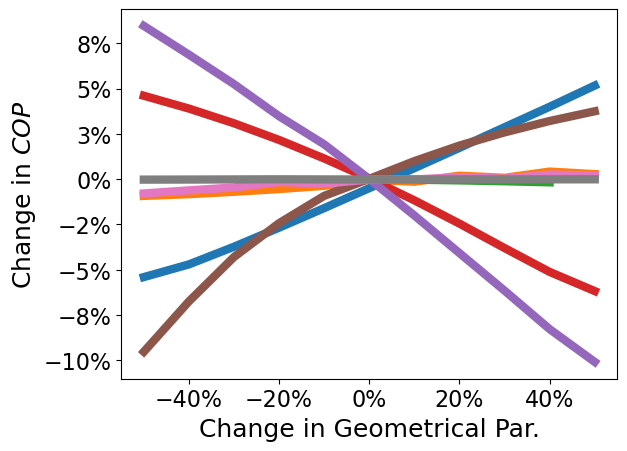

In [338]:
plt.plot(perf_Do['Do']/0.025-1,perf_f['COPh']/1.522-1,linewidth=6,label="$D_o$")
plt.plot(perf_Di['Di']/0.005-1,perf_Di['COPh']/1.524-1,linewidth=6,label="$D_i$")
plt.plot(perf_Dii['Dii']/0.005,perf_Dii['COPh']/1.521-1,linewidth=6,label="$D_{an}/D_i$")
plt.plot(perf_dp['dp']/0.001-1,perf_dp['COPh']/1.515-1,linewidth=6,label="$D_p$")
plt.plot(perf_p['p']/0.02-1,perf_p['COPh']/1.517-1,linewidth=6,label="$p$")
plt.plot(perf_L['La']/0.273735-1,perf_L['COPh']/1.514-1,linewidth=6,label="$L$")
plt.plot(perf_tf['tf']/0.0025-1,perf_tf['COPh']/1.521-1,linewidth=6,label="$t_f$")
plt.plot(perf_tt['tt']/0.001-1,perf_tt['COPh']/1.519-1,linewidth=6,label="$t_t$")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.xlabel('Change in Geometrical Par.',fontsize=18)
plt.ylabel('Change in $COP$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(fontsize=16)
plt.savefig('cop_geo.pdf',bbox_inches='tight')
plt.show()

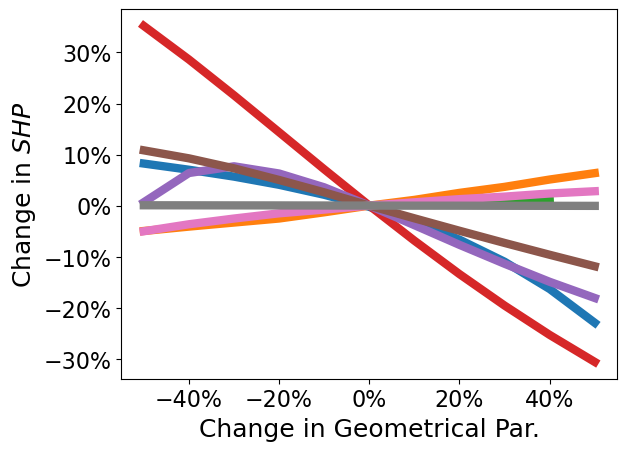

In [339]:
plt.plot(perf_Do['Do']/0.025-1,perf_f['SHP']/806.5-1,linewidth=6,label="$D_o$")
plt.plot(perf_Di['Di']/0.005-1,perf_Di['SHP']/806.8-1,linewidth=6,label="$D_i$")
plt.plot(perf_Dii['Dii']/0.005,perf_Dii['SHP']/806.2-1,linewidth=6,label="$D_{an}/D_i$")
plt.plot(perf_dp['dp']/0.001-1,perf_dp['SHP']/804.7-1,linewidth=6,label="$D_p$")
plt.plot(perf_p['p']/0.02-1,perf_p['SHP']/805.1-1,linewidth=6,label="$p$")
plt.plot(perf_L['La']/0.273735-1,perf_L['SHP']/804.5-1,linewidth=6,label="$L$")
plt.plot(perf_tf['tf']/0.0025-1,perf_tf['SHP']/800.9-1,linewidth=6,label="$t_f$")
plt.plot(perf_tt['tt']/0.001-1,perf_tt['SHP']/800.4-1,linewidth=6,label="$t_t$")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.xlabel('Change in Geometrical Par.',fontsize=18)
plt.ylabel('Change in $SHP$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(fontsize=16)
plt.savefig('sh_geo.pdf',bbox_inches='tight')
plt.show()

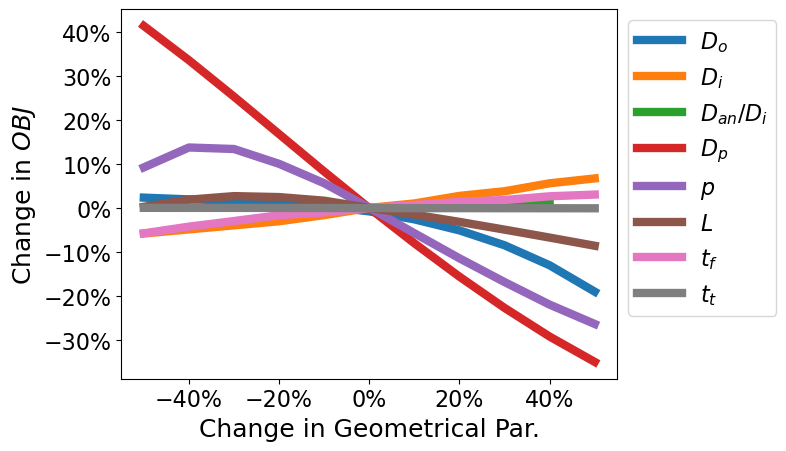

In [344]:
plt.plot(perf_Do['Do']/0.025-1,perf_f['indh']/1228-1,linewidth=6,label="$D_o$")
plt.plot(perf_Di['Di']/0.005-1,perf_Di['indh']/1229-1,linewidth=6,label="$D_i$")
plt.plot(perf_Dii['Dii']/0.005,perf_Dii['indh']/1226-1,linewidth=6,label="$D_{an}/D_i$")
plt.plot(perf_dp['dp']/0.001-1,perf_dp['indh']/1220-1,linewidth=6,label="$D_p$")
plt.plot(perf_p['p']/0.02-1,perf_p['indh']/1221-1,linewidth=6,label="$p$")
plt.plot(perf_L['La']/0.273735-1,perf_L['indh']/1218-1,linewidth=6,label="$L$")
plt.plot(perf_tf['tf']/0.0025-1,perf_tf['indh']/1218-1,linewidth=6,label="$t_f$")
plt.plot(perf_tt['tt']/0.001-1,perf_tt['indh']/1216-1,linewidth=6,label="$t_t$")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.xlabel('Change in Geometrical Par.',fontsize=18)
plt.ylabel('Change in $OBJ$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16,bbox_to_anchor=(1, 1))
plt.savefig('obj_geo.pdf',bbox_inches='tight')
plt.show()

In [357]:
wa=np.zeros((21))
wd=np.zeros((21))
La_v=np.zeros((21))
Ld_v=np.zeros((21))
ta=np.zeros((21))
td=np.zeros((21))
tha=np.zeros((21))
thd=np.zeros((21))

Qd=np.zeros((20))
Qa=np.zeros((20))
med=np.zeros((20))
mea=np.zeros((20))
for n in range(0,21):
    if n>0:
        wa[n]=da.data("reactor.w["+str(n)+"]")[-1]
        wd[n]=dd.data("reactor.w["+str(n)+"]")[-1]
        La_v[n]=La/20*n
        Ld_v[n]=Ld/20*n
        ta[n]=da.data("reactor.T_b["+str(n)+"]")[-1]
        td[n]=dd.data("reactor.T_b["+str(n)+"]")[-1]
    else:
        wa[n]=wia
        wd[n]=wid
        La_v[n]=0
        Ld_v[n]=0
        ta[n]=tia
        td[n]=tid

for n in range(0,21):
    if n<20:
        tha[n]=da.data("reactor.T_h["+str(n+1)+"]")[-1]
        thd[n]=dd.data("reactor.T_h["+str(n+1)+"]")[-1]
        Qa[n]=da.data("reactor.qh12["+str(n+1)+"]")[-1]
        Qd[n]=dd.data("reactor.qh12["+str(n+1)+"]")[-1]
        mea[n]=da.data("reactor.mdot_e["+str(n+1)+"]")[-1]*da.data("reactor.dN")[-1]
        med[n]=dd.data("reactor.mdot_e["+str(n+1)+"]")[-1]*dd.data("reactor.dN")[-1]
    else:
        
        tha[n]=25+273.15
        thd[n]=90+273.15
        

Q6=abs(da.data("reactor.Qh6")[-1])+abs(dd.data("reactor.Qh6")[-1])
Q7=abs(da.data("reactor.Qh7")[-1])+abs(dd.data("reactor.Qh7")[-1])
Q8=abs(da.data("reactor.Qh8")[-1])+abs(dd.data("reactor.Qh8")[-1])
Q9=abs(da.data("reactor.Qh9")[-1])+abs(dd.data("reactor.Qh9")[-1])
Q10=abs(da.data("reactor.Qh10")[-1])+abs(dd.data("reactor.Qh10")[-1])
Q11=abs(da.data("reactor.Qh11")[-1])+abs(dd.data("reactor.Qh11")[-1])
Q12=abs(da.data("reactor.Qh12")[-1])+abs(dd.data("reactor.Qh12")[-1])

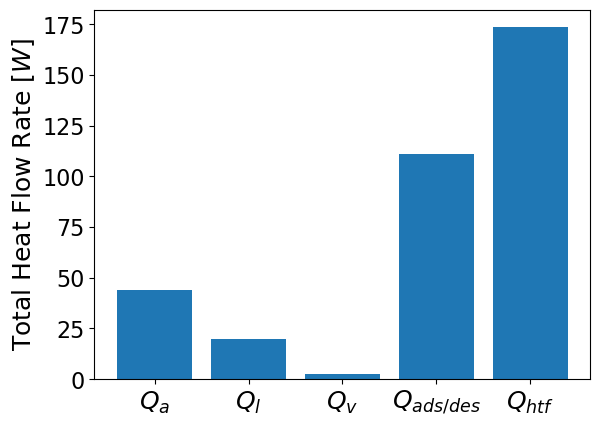

In [366]:
plt.bar(['$Q_{a}$','$Q_{l}$','$Q_{v}$','$Q_{ads/des}$','$Q_{htf}$']
        ,[Q6,Q7,Q8+Q11,Q9,Q12])
plt.ylabel('Total Heat Flow Rate $[W]$', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.savefig('Qdist.pdf',bbox_inches='tight')
plt.show()

In [168]:
La_v

array([0.        , 0.01368675, 0.0273735 , 0.04106025, 0.054747  ,
       0.06843375, 0.0821205 , 0.09580725, 0.109494  , 0.12318075,
       0.1368675 , 0.15055425, 0.164241  , 0.17792775, 0.1916145 ,
       0.20530125, 0.218988  , 0.23267475, 0.2463615 , 0.26004825,
       0.273735  ])

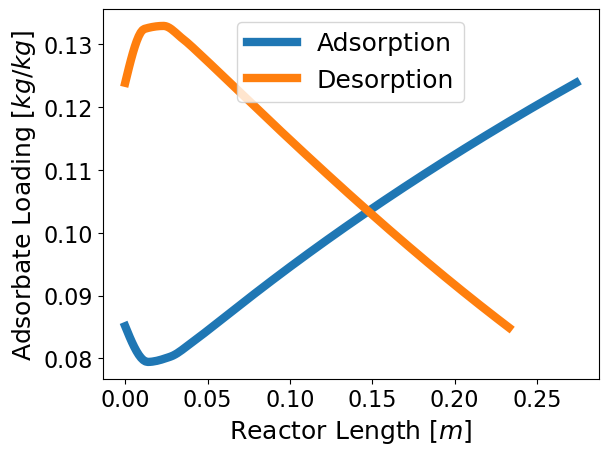

In [228]:
La_new = np.linspace(0, La, 200)
Ld_new = np.linspace(0, Ld, 200)

bspline = pchip(La_v, wa)
wa_new = bspline(La_new)
bspline = pchip(Ld_v, wd)
wd_new = bspline(Ld_new)


plt.plot(La_new,wa_new, label='Adsorption',linewidth=6)
plt.plot(Ld_new,wd_new, label='Desorption',linewidth=6)
plt.xlabel('Reactor Length $[m]$',fontsize=18)
plt.ylabel('Adsorbate Loading $[kg/kg]$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
#plt.savefig('Loading_cof.pdf',bbox_inches='tight')
plt.show()

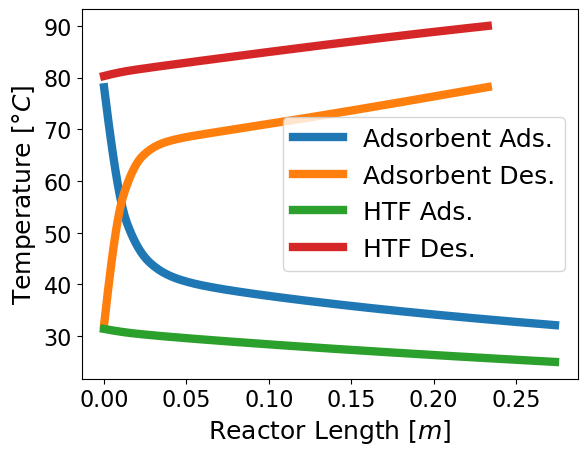

In [229]:
bspline = pchip(La_v, ta)
ta_new = bspline(La_new)
bspline = pchip(Ld_v, td)
td_new = bspline(Ld_new)
bspline = pchip(La_v, tha)
tha_new = bspline(La_new)
bspline = pchip(Ld_v, thd)
thd_new = bspline(Ld_new)

plt.plot(La_new,ta_new-273.15, label='Adsorbent Ads.',linewidth=6)
plt.plot(Ld_new,td_new-273.15, label='Adsorbent Des.',linewidth=6)
plt.plot(La_new,tha_new-273.15, label='HTF Ads.',linewidth=6)
plt.plot(Ld_new,thd_new-273.15, label='HTF Des.',linewidth=6)
plt.xlabel('Reactor Length $[m]$',fontsize=18)
plt.ylabel('Temperature $[°C]$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
#plt.savefig('Temps_cof.pdf',bbox_inches='tight')
plt.show()

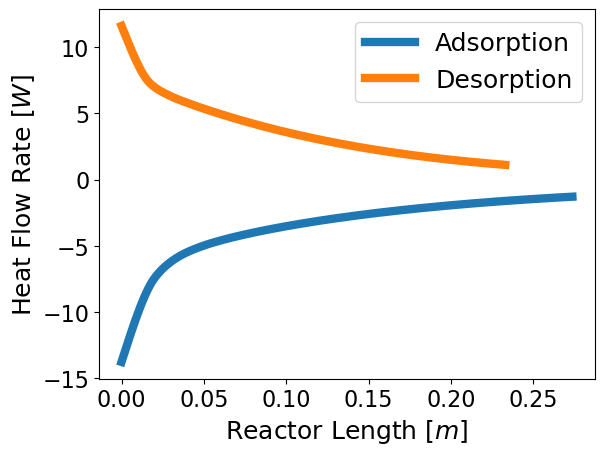

In [171]:
bspline = pchip(La_v[1:]-La/40, Qa)
Qa_new = bspline(La_new)
bspline = pchip(Ld_v[1:]-Ld/40, Qd)
Qd_new = bspline(Ld_new)
bspline = pchip(La_v[1:]-Ld/40, mea)
mea_new = bspline(La_new)
bspline = pchip(Ld_v[1:]-Ld/40, med)
med_new = bspline(Ld_new)

plt.plot(La_new,Qa_new, label='Adsorption',linewidth=6)
plt.plot(Ld_new,Qd_new, label='Desorption',linewidth=6)
plt.xlabel('Reactor Length $[m]$',fontsize=18)
plt.ylabel('Heat Flow Rate $[W]$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.savefig('heats_cof.pdf',bbox_inches='tight')
plt.show()

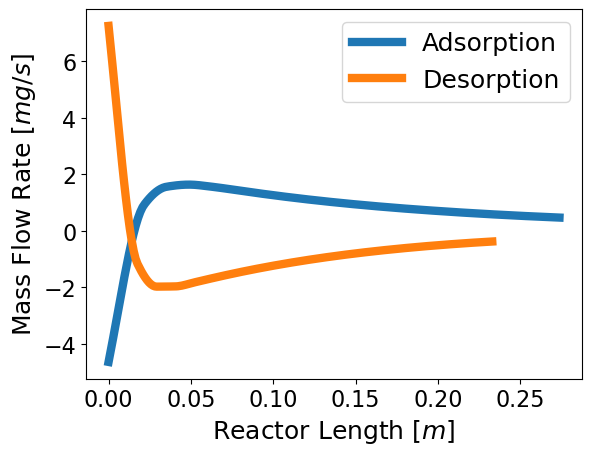

In [172]:

plt.plot(La_new,mea_new*1e6, label='Adsorption',linewidth=6)
plt.plot(Ld_new,med_new*1e6, label='Desorption',linewidth=6)
plt.xlabel('Reactor Length $[m]$',fontsize=18)
plt.ylabel('Mass Flow Rate $[mg/s]$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.savefig('mdots_cof.pdf',bbox_inches='tight')
plt.show()

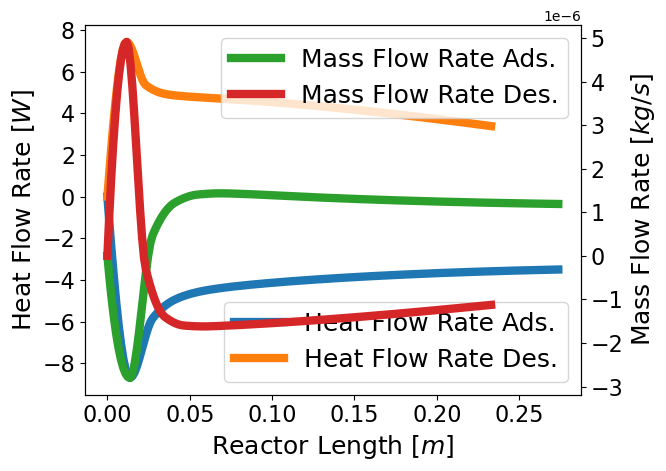

In [122]:
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Reactor Length $[m]$',fontsize=18) 
ax1.set_ylabel('Heat Flow Rate $[W]$',fontsize=18) 
ax1.plot(La_new,Qa_new,color = 'tab:blue', label='Heat Flow Rate Ads.',linewidth=6) 
ax1.plot(Ld_new,Qd_new,color = 'tab:orange', label='Heat Flow Rate Des.',linewidth=6) 


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18) 

# Adding Twin Axes

ax2 = ax1.twinx() 
ax2.plot(La_new,mea_new,color = 'tab:green', label='Mass Flow Rate Ads.',linewidth=6)  
ax2.plot(Ld_new,med_new,color = 'tab:red', label='Mass Flow Rate Des.',linewidth=6)  

# Add label

plt.ylabel('Mass Flow Rate $[kg/s]$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18) 

plt.show()

In [20]:
print(wia,wid)

0.07480866939942094 0.11608491544801205


In [134]:
frequency = 500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
for n in range(1,4):
    winsound.Beep(frequency, duration)

In [23]:
perf_rev

,COPh,COPc,SHP,SCP,VHP,VCP,La,mha,Ld,mhd,...,wdf,tdi,tdf,Do,Di,Dii,dp,f,p,indh
0,1.521499,0.577300,637.684153,241.955700,301747.677304,114491.743458,0.344790,0.001012,0.285120,0.002061,...,0.067120,308.052032,356.489077,0.025,0.005,0.0,0.001,0.5,0.02,970.235691
1,1.527708,0.583583,657.970815,251.344232,311347.183897,118934.331019,0.344790,0.001113,0.285120,0.002061,...,0.067903,307.627841,356.218373,0.025,0.005,0.0,0.001,0.5,0.02,1005.187289
2,1.509444,0.567515,599.038169,225.223875,283460.668482,106574.361007,0.344790,0.000911,0.316800,0.002061,...,0.063956,308.694713,357.615324,0.025,0.005,0.0,0.001,0.5,0.02,904.214766
3,1.525045,0.581819,624.376110,238.205517,295450.404713,112717.183279,0.344790,0.001012,0.316800,0.002061,...,0.064673,308.218099,357.354163,0.025,0.005,0.0,0.001,0.5,0.02,952.201751
4,1.531166,0.588243,644.651234,247.661950,305044.451586,117191.901249,0.344790,0.001113,0.316800,0.002061,...,0.065365,307.791553,357.104992,0.025,0.005,0.0,0.001,0.5,0.02,987.067911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,1.519119,0.577681,801.388752,304.747203,542564.860069,206323.239966,0.277121,0.002045,0.238723,0.002121,...,0.074355,306.389032,354.118761,0.025,0.005,0.0,0.001,0.5,0.02,1217.404843
533,1.517594,0.576496,802.230486,304.747203,543134.739895,206323.239966,0.277121,0.002045,0.238723,0.002148,...,0.074237,306.389032,354.156088,0.025,0.005,0.0,0.001,0.5,0.02,1217.459910
534,1.523268,0.580955,804.958426,307.000961,544982.227069,207849.327096,0.277121,0.002045,0.232900,0.002121,...,0.075061,306.370400,353.901563,0.025,0.005,0.0,0.001,0.5,0.02,1226.167347
535,1.519342,0.577763,802.736297,305.258139,543478.447342,206669.637072,0.277121,0.002045,0.235811,0.002121,...,0.074733,306.370400,354.002335,0.025,0.005,0.0,0.001,0.5,0.02,1219.631247


In [24]:
perf_rev.to_csv('perf_rev.csv')

In [25]:
perf=perf_rev
best=perf[perf.indh == perf.indh.max()]

In [26]:
print(best)

         COPh      COPc        SHP         SCP          VHP            VCP  \
475  1.523018  0.580695  806.68331  307.571193  546149.8836  208235.337634   

           La       mha        Ld       mhd  ...       wdf         tdi  \
475  0.273735  0.002045  0.232928  0.002121  ...  0.074866  306.432503   

            tdf     Do     Di  Dii     dp    f     p         indh  
475  353.961569  0.025  0.005  0.0  0.001  0.5  0.02  1228.593474  

[1 rows x 25 columns]


In [139]:
print(best['thoa'],best['wdf'])

475    0.115971
Name: wdi, dtype: float64 475    0.074866
Name: wdf, dtype: float64


In [140]:
print(best['thod'],best['thoa'])

KeyError: 'thod'

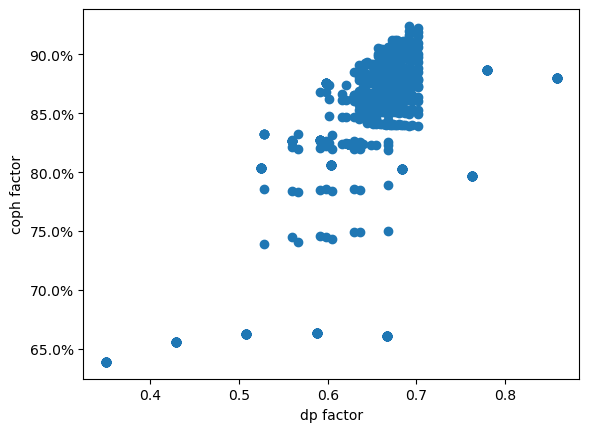

In [1031]:
plt.scatter(perf['La']+perf['Ld'],perf['COPh']/2.219)
#plt.xscale('log')
#plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.xlabel('dp factor')
plt.ylabel('coph factor')
#plt.savefig('cop_dp.pdf', bbox_inches='tight')
plt.show()

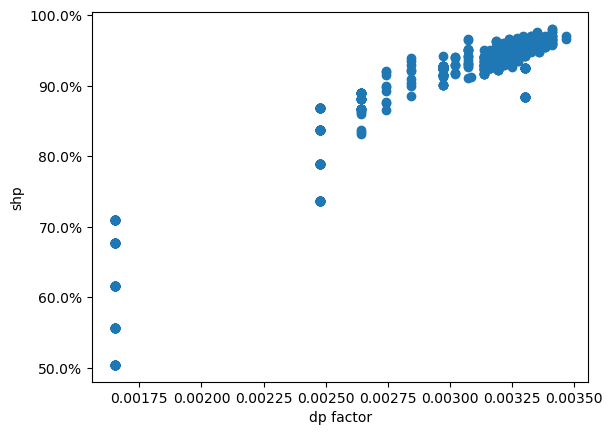

In [1032]:
plt.scatter((perf['mha']+perf['mhd']),perf['SHP']/3020)
#plt.xscale('log')
#plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.xlabel('dp factor')
plt.ylabel('shp')
plt.savefig('shp_dp.pdf', bbox_inches='tight')
plt.show()

In [1016]:
plt.scatter((perf['dp'])/0.001,perf['indh']/6701)
#plt.xscale('log')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.xlabel('dp factor')
plt.ylabel('indh')
plt.savefig('indh_dp.pdf', bbox_inches='tight')
plt.show()

KeyError: 'dp'

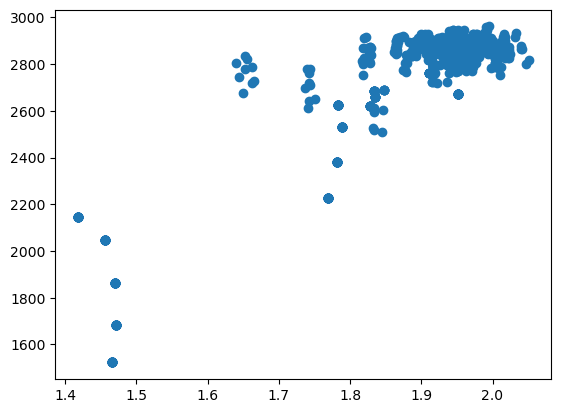

In [1033]:
plt.scatter(perf['COPh'],perf['SHP'])
plt.show()

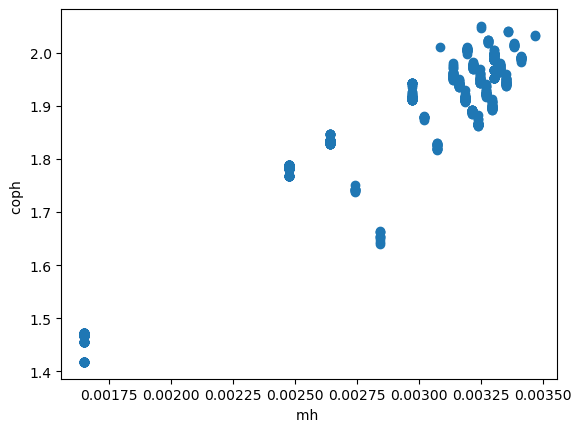

In [1034]:
import matplotlib.ticker as mtick
from matplotlib.ticker import StrMethodFormatter

plt.scatter((perf['mha']+perf['mhd']),perf['COPh'])
#plt.xscale('log')
#plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.xlabel('mh ')
plt.ylabel('coph ')
#plt.savefig('cop_mh.pdf', bbox_inches='tight')
plt.show()

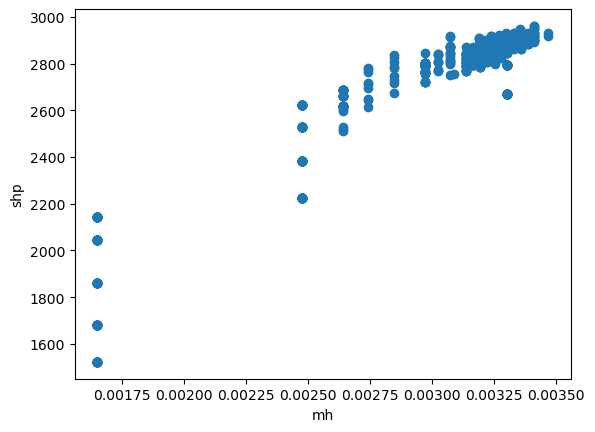

In [1035]:
plt.scatter((perf['mha']+perf['mhd']),perf['SHP'])
#plt.xscale('log')
#plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.xlabel('mh')
plt.ylabel('shp')
#plt.savefig('shp_mh.pdf', bbox_inches='tight')
plt.show()

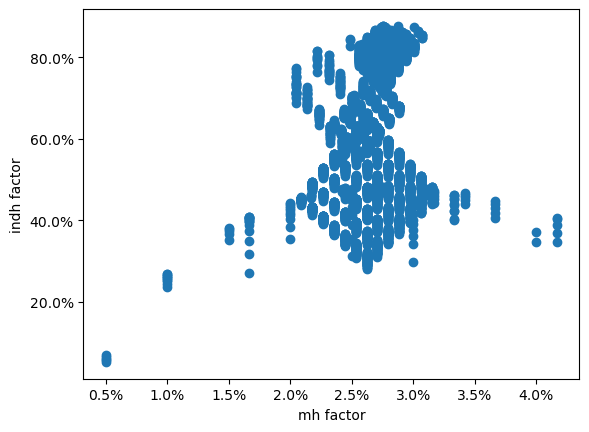

In [786]:
plt.scatter((perf['mha']+perf['mhd'])/0.12,perf['SHP']*perf['COPh']/7601)
#plt.xscale('log')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=1))
plt.xlabel('mh factor')
plt.ylabel('indh factor')
plt.savefig('indh_mh.pdf', bbox_inches='tight')
plt.show()

In [421]:
KPItot.to_csv('cyc2.csv')

NameError: name 'KPItot' is not defined